In [7]:
"""
*********************************************************************************

CAP 6683 Fall 2022
Submission Date: Dec 6th, 2022

*********************************************************************************
"""

# 1. Import libraries.
# 2. Get/Load the data i.e.., breast cancer dataset.
# 3. Split breast cancer dataset into training and test sets.
# 4. Create SVM model.
# 5. Create Logistic Regression model.
# 6. Check accuracy, f1-score, precision and recall of SVM,Logistic Regression, RidgeClassifier, SGDClassifier model.
# 7. Compare SVM ,Logistic Regression, RidgeClassifier, SGDClassifier

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import RidgeClassifier,SGDClassifier
import pandas as pd
import matplotlib.pyplot as plt


class multiModel:
    def __init__(self):
        self.cancer = datasets.load_breast_cancer()
        
        self.extractIndAndDepVars()
        self.splitDataSet()
        self.applyNormalization()
        self.addSupportingModels()
        self.handleMetricCals()

    def extractIndAndDepVars(self):
        #Extracting independent and dependent variable
        self.x = self.cancer.data
        self.y = self.cancer.target
    def splitDataSet(self):
        #Splitting the dataset into training and test data
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x,self.y, test_size = 0.25, random_state = 0)
    def applyNormalization(self):
        #Apply normalization operation for numerical stability
        self.st = StandardScaler()
        self.x = self.st.fit_transform(self.x)
    def addSupportingModels(self):
        self.models = {}
        #Support Vector Machines
        #Fitting the SVM Classifier to the training set
        self.models['Support Vector Machines'] = SVC()
        #Logistics Regression
        self.models['Logistic Regression'] = LogisticRegression(max_iter=3000)
        #Ridge Classifier
        self.models['Ridge Classifier'] = RidgeClassifier()
        #SGDClassifier
        self.models['SGDClassifier'] = SGDClassifier()

    def handleMetricCals(self):  
        self.accuracy, self.f1, self.precision, self.recall = {}, {}, {}, {}
        for key in self.models.keys():
            #Fit the classifier model
            self.models[key].fit(self.x_train, self.y_train)
            #Prediction
            predictions = self.models[key].predict(self.x_test)
            #Calculate Accuracy, f1, Precision and Recall Metrics
            self.accuracy[key] = accuracy_score(predictions, self.y_test)
            self.f1[key] = f1_score(predictions, self.y_test)
            self.precision[key] = precision_score(predictions, self.y_test)
            self.recall[key] = recall_score(predictions, self.y_test)

        self.model = pd.DataFrame(index = self.models.keys())
        self.model['Accuracy_score'] = self.accuracy.values()
        self.model['f1_score'] = self.f1.values()
        self.model['Precision_score'] = self.precision.values()
        self.model['Recall_score'] = self.recall.values()

    def handlePlotting(self):
        #Compare SVM & Logistic Regression
        compare = self.model.plot.bar(rot = 45)
        compare.legend(ncol = len(self.models.keys()), bbox_to_anchor = (0,1), loc = 'lower left', prop = {'size':14})
        plt.tight_layout()

model = multiModel()
model.cancer
model.model


,Accuracy_score,f1_score,Precision_score,Recall_score
Support Vector Machines,0.937063,0.951872,0.988889,0.917526
Logistic Regression,0.951049,0.960000,0.933333,0.988235
Ridge Classifier,0.958042,0.967742,1.000000,0.937500
SGDClassifier,0.930070,0.946809,0.988889,0.908163


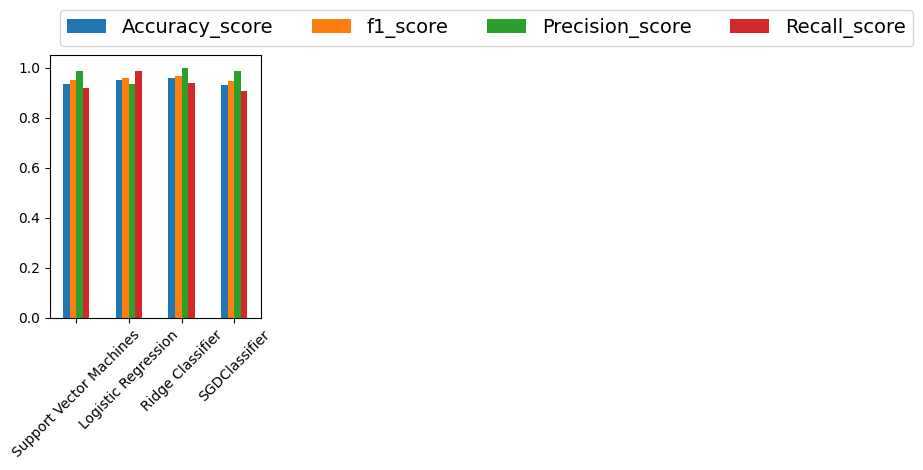

In [8]:
model.handlePlotting()
# As a result, a Logistic Regression and Ridge classifier with accuracy of 95% is better than SVM and SGDC classifier with accuracy of 93% and 92% respectively.


In [9]:
# Import libraries.
# Get/Load the data, heart disease dataset.
# Split heart disease dataset into training and test sets.
# Create SVM model.
# Predict the accuracy of SVM model.
# Apply normalization operation for numerical stability (StandardScaler).
# Logistic Regression on standardized dataset.
# Predict the accuracy of standard scaling.
# Compare the accuracy of SVM and Standard Scaling.

import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

class multiModelHeartDiseaseSvm:
    def __init__(self):
        self.df = pd.read_csv("heart.csv")
        self.extractIndAndDepVars()
        self.splitDataSet()
        self.fitData()
    def extractIndAndDepVars(self):
        #Extracting Independent and dependent variable
        self.x = self.df.drop('target', axis = 1)
        self.y = self.df.target
        self.x = self.x.values
        self.y = self.y.values
    def splitDataSet(self):
        #Splitting dataset into training and test sets
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size = 0.3, random_state = 10)
        self.model = svm.SVC(kernel = 'linear')
    def fitData(self):
        #fitting data
        self.model.fit(self.x_train, self.y_train)
        #prediction
        self.prediction = self.model.predict(self.x_test)
        #Accuracy of svm
        self.ac_score = accuracy_score(self.prediction, self.y_test)
        print(self.ac_score)
        
multiModelHeartDiseaseSvm()

0.7692307692307693


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


class multiModelHeartDiseaseLogisticRegression:
    def __init__(self):
        self.df = pd.read_csv("heart.csv")
        self.extractIndAndDepVars()
        self.splitDataSet()
        self.standardScaling()
        self.transformTrainingAndTestData()
        self.logisticRegressionOnStandardizedData()
    def extractIndAndDepVars(self):
        #Extracting Independent and dependent variable
        self.x = self.df.drop('target', axis = 1)
        self.y = self.df.target
        self.x = self.x.values
        self.y = self.y.values
    def splitDataSet(self):
        #Splitting dataset into training and test sets
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size = 0.3, random_state = 10)
    def standardScaling(self):
        #Standard Scaling
        self.st = StandardScaler()
    def transformTrainingAndTestData(self):
        #transform training and test data
        self.x_train_std = self.st.fit_transform(self.x_train)
        self.x_test_std = self.st.transform(self.x_test)
    def logisticRegressionOnStandardizedData(self):
        #Logistic Regression on standardized dataset
        self.model = LogisticRegression()
        self.model.fit(self.x_train, self.y_train)
        predictions = self.model.predict(self.x_test_std)
        self.ac_score = accuracy_score(predictions, self.y_test)
        print(self.ac_score)
multiModelHeartDiseaseLogisticRegression()

# As a result strandard scaling of 82.4% is better then SVM of 76.9%

0.8241758241758241


C:\Users\brand\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
